In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic' #sns 한글화
# https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9

In [3]:
df = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/train.csv')
df_test = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/test.csv')
submission = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/sample_submission.csv')

In [4]:
df.info() #각 칼럼의 상관관계를 분석해보자. object -> int 변환이 필수적이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [5]:
df.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  월   2601      50     150             238          0.0   
1  2016-02-02  화   2601      50     173             319          0.0   
2  2016-02-03  수   2601      56     180             111          0.0   
3  2016-02-04  목   2601     104     220             355          0.0   
4  2016-02-05  금   2601     278     181              34          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2  모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3  모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4  모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0

In [8]:
df_test

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0   2021-01-27  수   2983      88     182               5        358.0   
1   2021-01-28  목   2983     104     212             409        348.0   
2   2021-01-29  금   2983     270     249               0        294.0   
3   2021-02-01  월   2924     108     154             538        322.0   
4   2021-02-02  화   2924      62     186             455        314.0   
5   2021-02-03  수   2924      59     199               5        286.0   
6   2021-02-04  목   2924      61     211             476        288.0   
7   2021-02-05  금   2924     169     252               0        256.0   
8   2021-02-08  월   2924      88     174             690        329.0   
9   2021-02-09  화   2924      94     183             542        329.0   
10  2021-02-10  수   2924     489     134               0        233.0   
11  2021-02-15  월   2924     178     131             795        355.0   
12  2021-02-16  화   2924      70     175             815        413.0   
13  2021-02-17  수   2924      77     181               3        379.0   
14  2021-02-18  목   2924      83     247             594        338.0   
15  2021-02-19  금   2924     176     268               1        280.0   
16  2021-02-22  월   2924     105     197             814        247.0   
17  2021-02-23  화   2924      75     200             783        233.0   
18  2021-02-24  수   2924      77     235               3        234.0   
19  2021-02-25  목   2924      91     252             585        235.0   
20  2021-02-26  금   2924     261     279               1        179.0   
21  2021-03-02  화   2975     139     166             781        248.0   
22  2021-03-03  수   2975      50     195               1        292.0   
23  2021-03-04  목   2975      72     236             746        263.0   
24  2021-03-05  금   2975     158     257               2        226.0   
25  2021-03-08  월   2975      97     170             939        264.0   
26  2021-03-09  화   2975      76     170            1003        282.0   
27  2021-03-10  수   2975      71     185               1        271.0   
28  2021-03-11  목   2975      93     223             609        261.0   
29  2021-03-12  금   2975     241     240               0        251.0   
30  2021-03-15  월   2975     126     148             864        314.0   
31  2021-03-16  화   2975      74     176             658        401.0   
32  2021-03-17  수   2975      90     192               4        371.0   
33  2021-03-18  목   2975     106     231             520        351.0   
34  2021-03-19  금   2975     253     255               0        266.0   
35  2021-03-22  월   2975     133     166             707        350.0   
36  2021-03-23  화   2975      82     205             688        349.0   
37  2021-03-24  수   2975      87     234               0        314.0   
38  2021-03-25  목   2975     118     260             441        297.0   
39  2021-03-26  금   2975     311     266               0        229.0   
40  2021-03-29  월   2975     121     178             660        318.0   
41  2021-03-30  화   2975      83     198             625        313.0   
42  2021-03-31  수   2975      86     217               0        317.0   
43  2021-04-01  목   2973      88     256             394        303.0   
44  2021-04-02  금   2973     275     272               0        224.0   
45  2021-04-05  월   2973     125     174             704        331.0   
46  2021-04-06  화   2973      76     170             636        364.0   
47  2021-04-07  수   2973      96     214               1        334.0   
48  2021-04-08  목   2973     105     238             509        324.0   
49  2021-04-09  금   2973     259     268               0        229.0   

                                                 조식메뉴  \
0   모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1   모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   
2   모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...   
3   모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...   
4  

In [11]:
pd.set_option('display.max_rows', None)
df.sort_values('중식계', ascending=False)
df['실제점심식사가능자수'] = df['본사정원수']-df['본사휴가자수']-df['본사출장자수']-df['현본사소속재택근무자수']
df.sort_values('실제점심식사가능자수', ascending=False)
df.sort_values('중식계', ascending=False)
df.sort_values('일자', ascending=True)
df.sort_values('석식계', ascending=True)
df.sort_values('본사시간외근무명령서승인건수', ascending=True)

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
317   2017-05-17  수   2637      46     268               0          0.0   
962   2020-01-10  금   2821     264     262               0          3.0   
514   2018-03-07  수   2714      41     238               0          0.0   
967   2020-01-17  금   2821     242     269               0          0.0   
257   2017-02-15  수   2632      51     233               0          0.0   
252   2017-02-08  수   2632      52     206               0          0.0   
975   2020-01-31  금   2821     183     265               0          0.0   
247   2017-02-01  수   2632      61     179               0          0.0   
244   2017-01-25  수   2697      79     203               0          0.0   
519   2018-03-14  수   2714      56     245               0          0.0   
985   2020-02-14  금   2872     160     273               0          0.0   
239   2017-01-18  수   2697      59     240               0          0.0   
990   2020-02-21  금   2872     181     277               0          0.0   
706   2018-12-26  수   2846     184     241               0          0.0   
234   2017-01-11  수   2697      57     223               0          0.0   
995   2020-02-28  금   2872     210     234               0          7.0   
262   2017-02-22  수   2632      75     252               0          0.0   
524   2018-03-21  수   2714      45     263               0          0.0   
710   2019-01-02  수   2985     108     129               0          0.0   
271   2017-03-08  수   2627      46     233               0          0.0   
725   2019-01-23  수   2985      86     224               0          0.0   
306   2017-04-26  수   2626      45     304               0          0.0   
917   2019-11-06  수   3104     119     295               0          0.0   
505   2018-02-21  수   2707      74     243               0          0.0   
301   2017-04-19  수   2626      36     256               0          0.0   
922   2019-11-13  수   3104     136     290               0          0.0   
927   2019-11-20  수   3104     174     288               0          0.0   
296   2017-04-12  수   2626      41     241               0          0.0   
720   2019-01-16  수   2985      80     228               0          0.0   
291   2017-04-05  수   2626      63     251               0          0.0   
286   2017-03-29  수   2627      42     237               0          0.0   
942   2019-12-11  수   3111     168     265               0          0.0   
281   2017-03-22  수   2627      53     235               0          0.0   
276   2017-03-15  수   2627      40     234               0          0.0   
715   2019-01-09  수   2985      85     225               0          0.0   
510   2018-02-28  수   2707     134     278               0          0.0   
229   2017-01-04  수   2697      67     170               0          0.0   
702   2018-12-19  수   2846      86     256               0          0.0   
224   2016-12-28  수   2705     166     225               0          0.0   
539   2018-04-11  수   2714      23     239               0          0.0   
179   2016-10-26  수   2670      89     258               0          0.0   
1041  2020-05-08  금   2962     153     265               0        246.0   
1044  2020-05-13  수   2962      68     242               0        236.0   
174   2016-10-19  수   2670      72     267               0          0.0   
1046  2020-05-15  금   2962     161     296               0        201.0   
1049  2020-05-20  수   2962      71     243               0        258.0   
682   2018-11-21  수   2815      81     290               0          0.0   
1051  2020-05-22  금   2962     226     277               0        206.0   
169   2016-10-12  수   2670      64     251               0          0.0   
1059  2020-06-03  수   2956      63     251               0        191.0   
164   2016-10-05  수   2670      41     228               0          0.0   
1061  2020-06-05  금   2956     233     291               0        176.0   
160   2016-09-28  수   2769      50     

In [7]:
#조식, 중식, 석식 메뉴 삭제
인트만 = df.drop(labels= '조식메뉴', axis=1)
인트만 = 인트만.drop(labels= '중식메뉴', axis=1)
인트만 = 인트만.drop(labels= '석식메뉴', axis=1)

In [8]:
인트만.info() #일자와 요일이 object다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   중식계             1205 non-null   float64
 8   석식계             1205 non-null   float64
 9   실제점심식사가능자수      1205 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 94.3+ KB


In [9]:
#corr을 위해 일자를 int로 변환하자.
#인트 변환 전, datatime으로 변환
인트만['일자']= pd.to_datetime(인트만['일자'])

In [10]:
인트만.info() #datatime64 변환완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   중식계             1205 non-null   float64       
 8   석식계             1205 non-null   float64       
 9   실제점심식사가능자수      1205 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 94.3+ KB


In [11]:
인트만['연도'] = 인트만['일자'].dt.year
인트만['월'] = 인트만['일자'].dt.month
인트만['일'] = 인트만['일자'].dt.day

# https://bigdaheta.tistory.com/16

In [12]:
인트만

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0    2016-02-01  월   2601      50     150             238          0.0   
1    2016-02-02  화   2601      50     173             319          0.0   
2    2016-02-03  수   2601      56     180             111          0.0   
3    2016-02-04  목   2601     104     220             355          0.0   
4    2016-02-05  금   2601     278     181              34          0.0   
5    2016-02-11  목   2601     383     143             417          0.0   
6    2016-02-12  금   2601     389     156              93          0.0   
7    2016-02-15  월   2601      87     204             482          0.0   
8    2016-02-16  화   2601      72     236             526          0.0   
9    2016-02-17  수   2601      78     250              23          0.0   
10   2016-02-18  목   2601      77     254             367          0.0   
11   2016-02-19  금   2601     145     252              69          0.0   
12   2016-02-22  월   2601      90     207             434          0.0   
13   2016-02-23  화   2601      57     237             488          0.0   
14   2016-02-24  수   2601      54     232              14          0.0   
15   2016-02-25  목   2601      56     261             335          0.0   
16   2016-02-26  금   2601     144     278              42          0.0   
17   2016-02-29  월   2601     595     168             110          0.0   
18   2016-03-02  수   2624     127     182             261          0.0   
19   2016-03-03  목   2624      61     224             351          0.0   
20   2016-03-04  금   2624      83     247              79          0.0   
21   2016-03-07  월   2624      50     195             456          0.0   
22   2016-03-08  화   2624      47     212             426          0.0   
23   2016-03-09  수   2624      43     225               0          0.0   
24   2016-03-10  목   2624      55     245             290          0.0   
25   2016-03-11  금   2624     108     275              76          0.0   
26   2016-03-14  월   2624      61     183             376          0.0   
27   2016-03-15  화   2624      38     231             399          0.0   
28   2016-03-16  수   2624      50     213               0          0.0   
29   2016-03-17  목   2624      52     242             327          0.0   
30   2016-03-18  금   2624     118     277              57          0.0   
31   2016-03-21  월   2624      65     205             329          0.0   
32   2016-03-22  화   2624      41     208             378          0.0   
33   2016-03-23  수   2624      42     236               0          0.0   
34   2016-03-24  목   2624      53     251             293          0.0   
35   2016-03-25  금   2624      98     275              59          0.0   
36   2016-03-28  월   2624      77     197             299          0.0   
37   2016-03-29  화   2624      52     245             259          0.0   
38   2016-03-30  수   2624      48     230               0          0.0   
39   2016-03-31  목   2624      36     248             158          0.0   
40   2016-04-01  금   2643     103     254              47          0.0   
41   2016-04-04  월   2643      62     221             367          0.0   
42   2016-04-05  화   2643      31     242             370          0.0   
43   2016-04-06  수   2643      37     249               0          0.0   
44   2016-04-07  목   2643      47     258             339          0.0   
45   2016-04-08  금   2643      87     283              64          0.0   
46   2016-04-11  월   2643      82     203             392          0.0   
47   2016-04-12  화   2643      76     225             239          0.0   
48   2016-04-14  목   2643     106     252             326          0.0   
49   2016-04-15  금   2643     131     281              82          0.0   
50   2016-04-18  월   2643      81     225             330          0.0   
51   2016-04-19  화   2643      44     239             387          0.0   
52   2016-04-20  수   2643      47     262               0          0.0   
53   2016-04-21  

In [13]:
인트만 = 인트만.drop(['일자'], axis=1)
#이유는 모르겠으나 레이블을 안쓰고, 요런식으로 쓰니 ... 오오,..

In [14]:
# 요일제외인트만 = 인트만.drop(['일자'], axis=1)

In [15]:
인트만

요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수     중식계    석식계  \
0     월   2601      50     150             238          0.0  1039.0  331.0   
1     화   2601      50     173             319          0.0   867.0  560.0   
2     수   2601      56     180             111          0.0  1017.0  573.0   
3     목   2601     104     220             355          0.0   978.0  525.0   
4     금   2601     278     181              34          0.0   925.0  330.0   
5     목   2601     383     143             417          0.0  1045.0  550.0   
6     금   2601     389     156              93          0.0   909.0  598.0   
7     월   2601      87     204             482          0.0  1268.0  672.0   
8     화   2601      72     236             526          0.0  1014.0  523.0   
9     수   2601      78     250              23          0.0   916.0  588.0   
10    목   2601      77     254             367          0.0   910.0  489.0   
11    금   2601     145     252              69          0.0   763.0  597.0   
12    월   2601      90     207             434          0.0  1298.0  645.0   
13    화   2601      57     237             488          0.0   899.0  610.0   
14    수   2601      54     232              14          0.0  1022.0  514.0   
15    목   2601      56     261             335          0.0   917.0  531.0   
16    금   2601     144     278              42          0.0   766.0  585.0   
17    월   2601     595     168             110          0.0   869.0  344.0   
18    수   2624     127     182             261          0.0  1127.0  631.0   
19    목   2624      61     224             351          0.0  1000.0  473.0   
20    금   2624      83     247              79          0.0   837.0  673.0   
21    월   2624      50     195             456          0.0  1326.0  625.0   
22    화   2624      47     212             426          0.0  1026.0  609.0   
23    수   2624      43     225               0          0.0   901.0  523.0   
24    목   2624      55     245             290          0.0   847.0  525.0   
25    금   2624     108     275              76          0.0   728.0  591.0   
26    월   2624      61     183             376          0.0  1286.0  586.0   
27    화   2624      38     231             399          0.0   958.0  545.0   
28    수   2624      50     213               0          0.0   998.0  531.0   
29    목   2624      52     242             327          0.0   832.0  548.0   
30    금   2624     118     277              57          0.0   757.0  521.0   
31    월   2624      65     205             329          0.0  1030.0  605.0   
32    화   2624      41     208             378          0.0   917.0  585.0   
33    수   2624      42     236               0          0.0   963.0  544.0   
34    목   2624      53     251             293          0.0   876.0  507.0   
35    금   2624      98     275              59          0.0   861.0  523.0   
36    월   2624      77     197             299          0.0  1193.0  637.0   
37    화   2624      52     245             259          0.0   892.0  465.0   
38    수   2624      48     230               0          0.0  1033.0  463.0   
39    목   2624      36     248             158          0.0   781.0  526.0   
40    금   2643     103     254              47          0.0   661.0  591.0   
41    월   2643      62     221             367          0.0  1237.0  614.0   
42    화   2643      31     242             370          0.0   840.0  555.0   
43    수   2643      37     249               0          0.0   876.0  492.0   
44    목   2643      47     258             339          0.0   853.0  524.0   
45    금   2643      87     283              64          0.0   764.0  542.0   
46    월   2643      82     203             392          0.0  1225.0  536.0   
47    화   2643      76     225             239          0.0   771.0  500.0   
48    목   2643     106     252             326          0.0   969.0  562.0   
49    금   2643     131     281              82          0.0   579.0  582.0   
50    월   2643      81     

In [16]:
# input_labels = ['월', '화','수', '목','금']

cols = 인트만.select_dtypes(include='object').columns
for col in cols:
    le = LabelEncoder()
    인트만[col] = le.fit_transform(인트만[col])

In [17]:
인트만

요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수     중식계    석식계  \
0      3   2601      50     150             238          0.0  1039.0  331.0   
1      4   2601      50     173             319          0.0   867.0  560.0   
2      2   2601      56     180             111          0.0  1017.0  573.0   
3      1   2601     104     220             355          0.0   978.0  525.0   
4      0   2601     278     181              34          0.0   925.0  330.0   
5      1   2601     383     143             417          0.0  1045.0  550.0   
6      0   2601     389     156              93          0.0   909.0  598.0   
7      3   2601      87     204             482          0.0  1268.0  672.0   
8      4   2601      72     236             526          0.0  1014.0  523.0   
9      2   2601      78     250              23          0.0   916.0  588.0   
10     1   2601      77     254             367          0.0   910.0  489.0   
11     0   2601     145     252              69          0.0   763.0  597.0   
12     3   2601      90     207             434          0.0  1298.0  645.0   
13     4   2601      57     237             488          0.0   899.0  610.0   
14     2   2601      54     232              14          0.0  1022.0  514.0   
15     1   2601      56     261             335          0.0   917.0  531.0   
16     0   2601     144     278              42          0.0   766.0  585.0   
17     3   2601     595     168             110          0.0   869.0  344.0   
18     2   2624     127     182             261          0.0  1127.0  631.0   
19     1   2624      61     224             351          0.0  1000.0  473.0   
20     0   2624      83     247              79          0.0   837.0  673.0   
21     3   2624      50     195             456          0.0  1326.0  625.0   
22     4   2624      47     212             426          0.0  1026.0  609.0   
23     2   2624      43     225               0          0.0   901.0  523.0   
24     1   2624      55     245             290          0.0   847.0  525.0   
25     0   2624     108     275              76          0.0   728.0  591.0   
26     3   2624      61     183             376          0.0  1286.0  586.0   
27     4   2624      38     231             399          0.0   958.0  545.0   
28     2   2624      50     213               0          0.0   998.0  531.0   
29     1   2624      52     242             327          0.0   832.0  548.0   
30     0   2624     118     277              57          0.0   757.0  521.0   
31     3   2624      65     205             329          0.0  1030.0  605.0   
32     4   2624      41     208             378          0.0   917.0  585.0   
33     2   2624      42     236               0          0.0   963.0  544.0   
34     1   2624      53     251             293          0.0   876.0  507.0   
35     0   2624      98     275              59          0.0   861.0  523.0   
36     3   2624      77     197             299          0.0  1193.0  637.0   
37     4   2624      52     245             259          0.0   892.0  465.0   
38     2   2624      48     230               0          0.0  1033.0  463.0   
39     1   2624      36     248             158          0.0   781.0  526.0   
40     0   2643     103     254              47          0.0   661.0  591.0   
41     3   2643      62     221             367          0.0  1237.0  614.0   
42     4   2643      31     242             370          0.0   840.0  555.0   
43     2   2643      37     249               0          0.0   876.0  492.0   
44     1   2643      47     258             339          0.0   853.0  524.0   
45     0   2643      87     283              64          0.0   764.0  542.0   
46     3   2643      82     203             392          0.0  1225.0  536.0   
47     4   2643      76     225             239          0.0   771.0  500.0   
48     1   2643     106     252             326          0.0   969.0  562.0   
49     0   2643     131     281              82         

In [18]:
co_only_int = 인트만.corr()

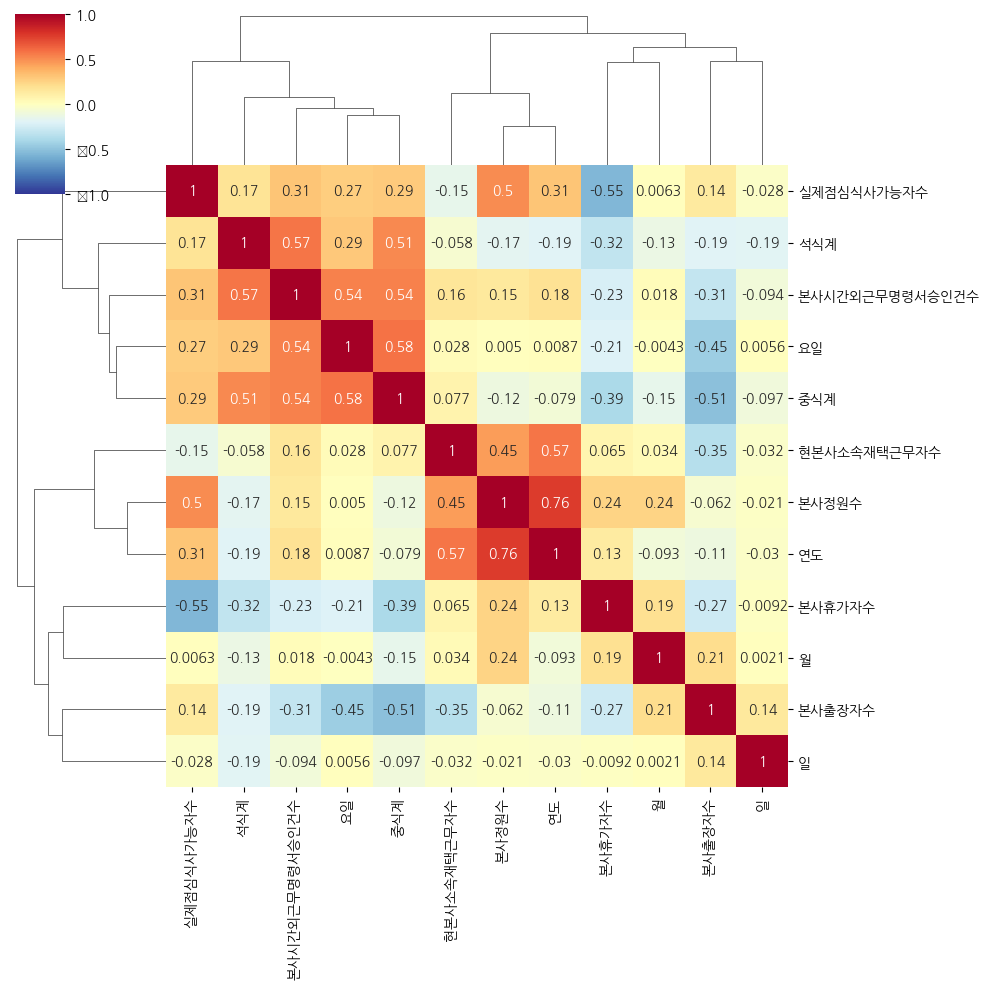

In [19]:
sns.clustermap(co_only_int, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

# 양의 상관관계
# 석식 - 근무명령서 승인건수 = 0.57
# 중식 - 석식= 0.51
# 요일 - 중식 = 0.58
# 중식 - 근무명령서 승인건수 = 0.54

# 음의 상관관계
# 본사출장자수 - 중식 = -0.51
# 본사휴가자수 - 중식 = 0.39

# 본사 정원수 - 현본사재택근무자수 = 0.57
# 본사 정원수 - 연도 = 0.76

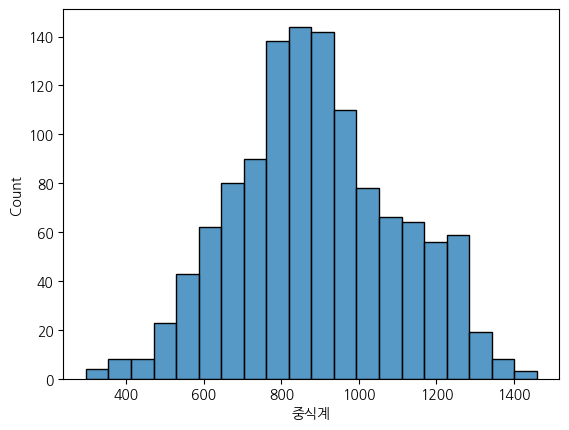

In [20]:
sns.histplot(인트만['중식계'], bins=20)
plt.show()

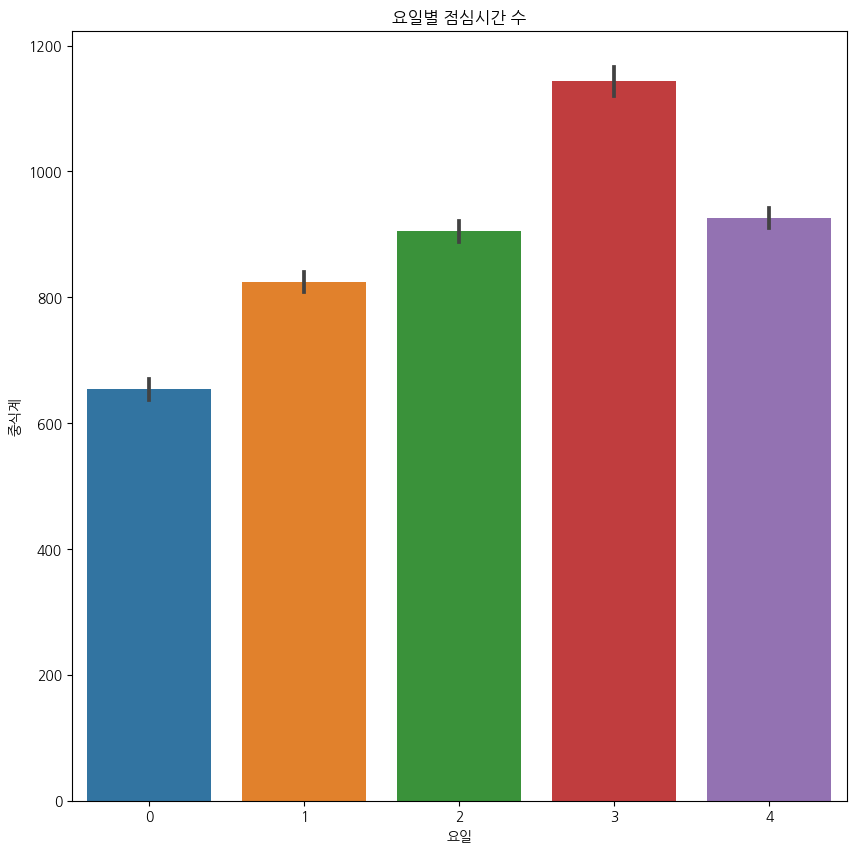

In [21]:
plt.figure(figsize=(10,10))


sns.barplot(x="요일", y="중식계", data=인트만)
plt.title("요일별 점심시간 수")
plt.show()

#레이블인코딩이 가나다 순서로 되어서 월화수목금이 01234 가 아니란 것을 깨달음.. ㅋㅋㅋㅋㅋㅋㅋ

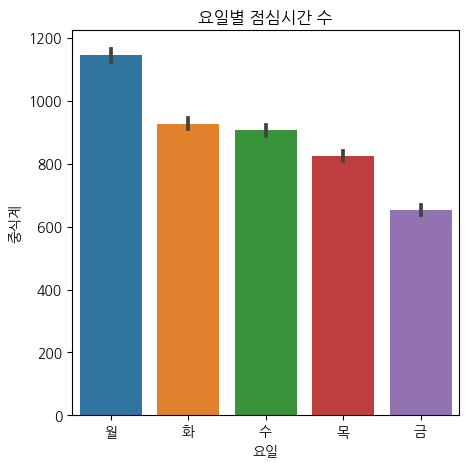

In [22]:
plt.figure(figsize=(5,5))


sns.barplot(x="요일", y="중식계", data=df)
# sns.barplot(x="요일", y="중식계", data=df)
plt.title("요일별 점심시간 수")
plt.show()

#요일에 있는 중식계를 자동으로 평균내어주는 것인가.. 월요일은 한 개가 아니라 수십개의 월요일이 있거늘,. 어찌 하나의 막대로 탄생된단 말인가!

In [23]:
#요일별 평균 직접 내보기.. 두둥..

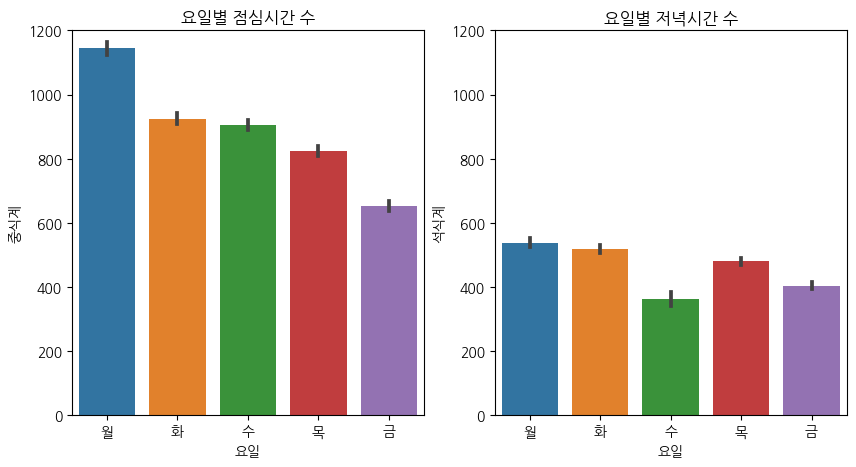

In [24]:
# x123123 = np.linspace(0.0, 4.0)
# x2 = np.linspace(0.0, 4.0)
# y = np.linspace(0.0, 1200.0)
# y2 = np.linspace(0.0, 1200.0)

# fig, ax = plt.subplots()
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.ylim((0,1200)) # https://wikidocs.net/92082 헐... y축..
sns.barplot(x="요일", y="중식계", data=df)
# ax.set_ylim(0, 1200)
plt.title("요일별 점심시간 수")

plt.subplot(1, 2, 2)
plt.ylim((0,1200)) # https://wikidocs.net/92082 헐... y축..
sns.barplot(x="요일", y="석식계" , data=df)
plt.title("요일별 저녁시간 수")


plt.show()



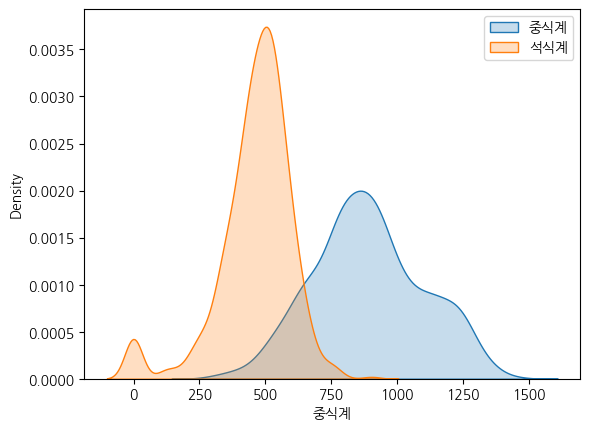

In [25]:
sns.kdeplot(df['중식계'], label='중식계', shade=True)
sns.kdeplot(df['석식계'], label='석식계',shade=True)
plt.legend()
plt.show()

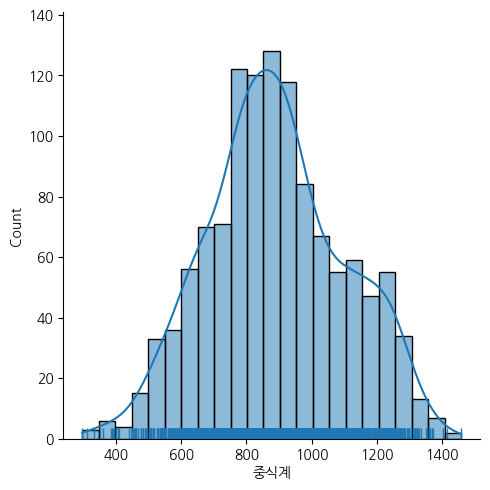

In [26]:
sns.displot(data=df['중식계'], kde=True, rug=True) #rug = 개수 시각화, kde=라인여부

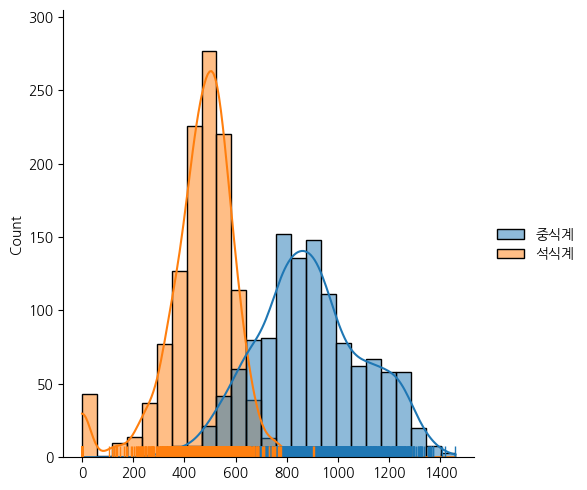

In [27]:
sns.displot(data=df[['중식계', '석식계']], kde=True, rug=True)
# sns.displot(data=df['석식계'], kde=True, color='blue') 

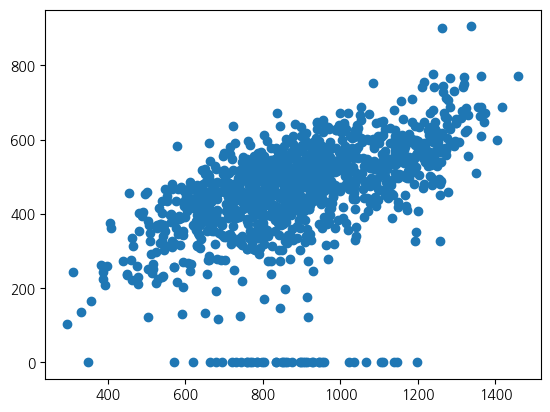

In [28]:
plt.scatter(df['중식계'],df['석식계'])

plt.show()

In [29]:
석식없는날 = 인트만.loc[df['석식계'] == 0, :]
석식없는날수요일만 = 석식없는날.loc[석식없는날['요일'] == 2, :]
석식없는날수요일만





요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수     중식계  석식계  \
204    2   2689      68     207               0          0.0  1109.0  0.0   
224    2   2705     166     225               0          0.0   767.0  0.0   
244    2   2697      79     203               0          0.0   720.0  0.0   
262    2   2632      75     252               0          0.0  1065.0  0.0   
281    2   2627      53     235               0          0.0   953.0  0.0   
306    2   2626      45     304               0          0.0   835.0  0.0   
327    2   2637      43     265               0          0.0   910.0  0.0   
346    2   2648      58     259               0          0.0   745.0  0.0   
366    2   2839     254     246               0          0.0   797.0  0.0   
410    2   2642      70     265               0          0.0  1023.0  0.0   
424    2   2645      75     289               0          0.0   786.0  0.0   
449    2   2644      78     261               0          0.0   903.0  0.0   
468    2   2665     169     255               0          0.0   571.0  0.0   
492    2   2655      56     223               0          0.0  1138.0  0.0   
502    2   2707     418     159               0          0.0   850.0  0.0   
510    2   2707     134     278               0          0.0   786.0  0.0   
529    2   2714      45     252               0          0.0   926.0  0.0   
549    2   2714      66     285               0          0.0   851.0  0.0   
571    2   2721      80     281               0          0.0   876.0  0.0   
589    2   2728      66     277               0          0.0   957.0  0.0   
609    2   2704     226     256               1          0.0   760.0  0.0   
633    2   2996     103     258               0          0.0   915.0  0.0   
648    2   2763      77     288               0          0.0   833.0  0.0   
667    2   2805     111     306               0          0.0   930.0  0.0   
687    2   2815      69     298               1          0.0   862.0  0.0   
706    2   2846     184     241               0          0.0   695.0  0.0   
730    2   2985      66     226               1          0.0   679.0  0.0   
747    2   2806     100     274               0          0.0   944.0  0.0   
766    2   2836      92     259               0          0.0   856.0  0.0   
786    2   2822      59     273               0          0.0  1034.0  0.0   
809    2   2825      50     237               0          0.0   896.0  0.0   
828    2   2758      69     282               0          0.0   946.0  0.0   
853    2   2760     495     231               0          0.0   619.0  0.0   
872    2   3305     123     274               0          0.0   899.0  0.0   
890    2   3111      60     285               1          0.0   803.0  0.0   
912    2   3121     122     294               1          0.0   771.0  0.0   
932    2   3104     134     288               1          0.0   732.0  0.0   
973    2   2821     101     214               4          0.0  1197.0  0.0   
993    2   2872     109     190               4          0.0  1105.0  0.0   
1166   2   3021     206     191               3        387.0  1146.0  0.0   

      실제점심식사가능자수    연도   월   일  
204       2414.0  2016  11  30  
224       2314.0  2016  12  28  
244       2415.0  2017   1  25  
262       2305.0  2017   2  22  
281       2339.0  2017   3  22  
306       2277.0  2017   4  26  
327       2329.0  2017   5  31  
346       2331.0  2017   6  28  
366       2339.0  2017   7  26  
410       2307.0  2017   9  27  
424       2281.0  2017  10  25  
449       2305.0  2017  11  29  
468       2241.0  2017  12  27  
492       2376.0  2018   1  31  
502       2130.0  2018   2  14  
510       2295.0  2018   2  28  
529       2417.0  2018   3  28  
549       2363.0  2018   4  25  
571       2360.0  2018   5  30  
589       2385.0  2018   6  27  
609       2222.0  2018   7  25  
633       2635.0  2018   8  29  
648       2398.0  2018   9  19  
667       2388.0  2018  10  31  
687       2448.0  2018 

In [30]:
석식칼럼도없는날수요일만 = 석식없는날수요일만.drop(['석식계'], axis=1)

In [31]:
# co_only_no_dinner = 석식칼럼도없는날수요일만.corr()
# 석식칼럼도없는날수요일만

In [32]:
# sns.clustermap(co_only_no_dinner, 
#                annot = True,      # 실제 값 화면에 나타내기
#                cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
#                vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
#               )

# ValueError: The condensed distance matrix must contain only finite values.
# 석식의 값이 모두 0이라 상관관계를 그릴 수 없는 것이었다!!
# 석식 줄을 지워보자.

<Figure size 1000x500 with 0 Axes>

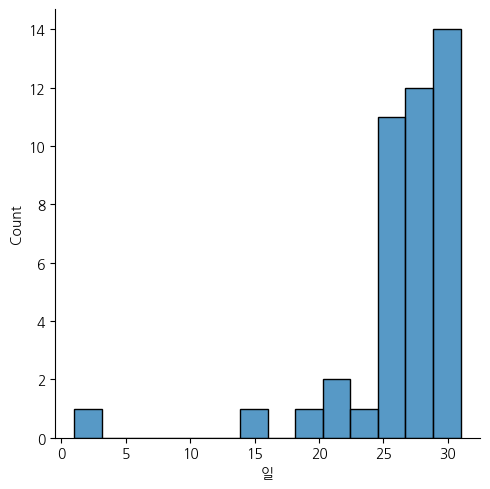

In [33]:
plt.figure(figsize=(10,5))
sns.displot(data=석식없는날['일'], kde=False)
plt.show()

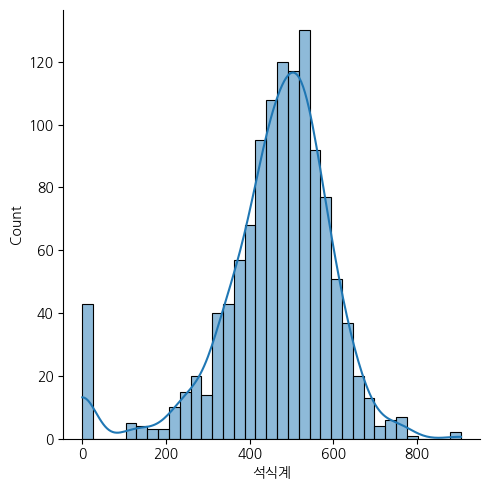

In [34]:
sns.displot(data=df['석식계'], kde=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
 12  실제점심식사가능자수      1205 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 122.5+ KB


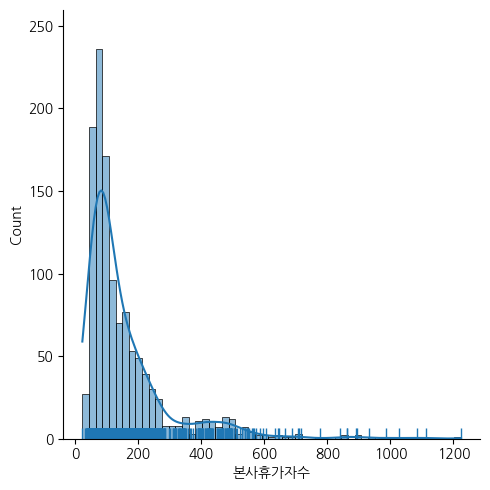

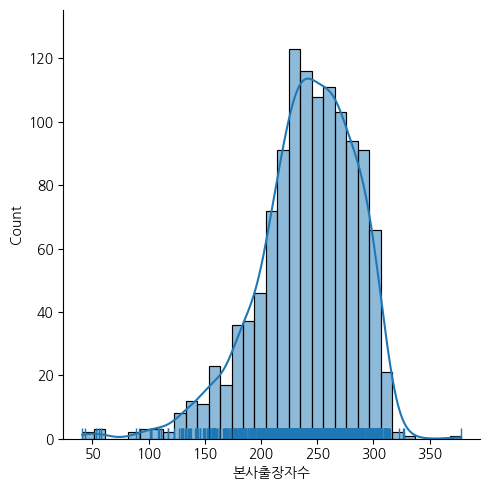

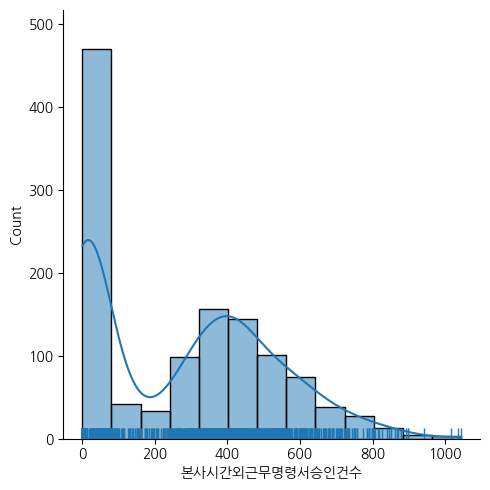

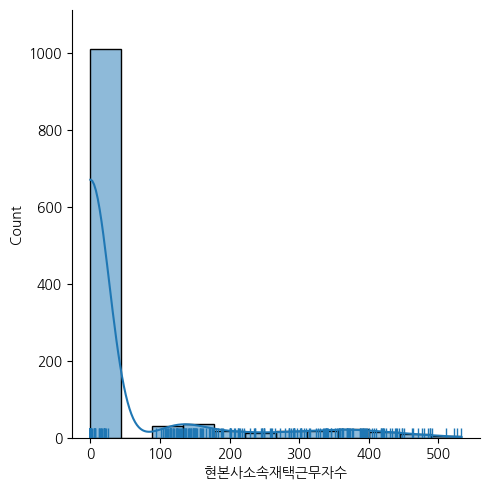

In [36]:
# sns.kdeplot(df['본사정원수'], shade=True)

ax = sns.displot(data=df['본사휴가자수'], kde=True, rug=True)
ax = sns.displot(data=df['본사출장자수'], kde=True, rug=True)
ax = sns.displot(data=df['본사시간외근무명령서승인건수'], kde=True, rug=True)
ax = sns.displot(data=df['현본사소속재택근무자수'], kde=True, rug=True)


In [37]:
인트만2 = 인트만.loc[df['석식계'] != 0, :]
인트만2 

요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수     중식계    석식계  \
0      3   2601      50     150             238          0.0  1039.0  331.0   
1      4   2601      50     173             319          0.0   867.0  560.0   
2      2   2601      56     180             111          0.0  1017.0  573.0   
3      1   2601     104     220             355          0.0   978.0  525.0   
4      0   2601     278     181              34          0.0   925.0  330.0   
5      1   2601     383     143             417          0.0  1045.0  550.0   
6      0   2601     389     156              93          0.0   909.0  598.0   
7      3   2601      87     204             482          0.0  1268.0  672.0   
8      4   2601      72     236             526          0.0  1014.0  523.0   
9      2   2601      78     250              23          0.0   916.0  588.0   
10     1   2601      77     254             367          0.0   910.0  489.0   
11     0   2601     145     252              69          0.0   763.0  597.0   
12     3   2601      90     207             434          0.0  1298.0  645.0   
13     4   2601      57     237             488          0.0   899.0  610.0   
14     2   2601      54     232              14          0.0  1022.0  514.0   
15     1   2601      56     261             335          0.0   917.0  531.0   
16     0   2601     144     278              42          0.0   766.0  585.0   
17     3   2601     595     168             110          0.0   869.0  344.0   
18     2   2624     127     182             261          0.0  1127.0  631.0   
19     1   2624      61     224             351          0.0  1000.0  473.0   
20     0   2624      83     247              79          0.0   837.0  673.0   
21     3   2624      50     195             456          0.0  1326.0  625.0   
22     4   2624      47     212             426          0.0  1026.0  609.0   
23     2   2624      43     225               0          0.0   901.0  523.0   
24     1   2624      55     245             290          0.0   847.0  525.0   
25     0   2624     108     275              76          0.0   728.0  591.0   
26     3   2624      61     183             376          0.0  1286.0  586.0   
27     4   2624      38     231             399          0.0   958.0  545.0   
28     2   2624      50     213               0          0.0   998.0  531.0   
29     1   2624      52     242             327          0.0   832.0  548.0   
30     0   2624     118     277              57          0.0   757.0  521.0   
31     3   2624      65     205             329          0.0  1030.0  605.0   
32     4   2624      41     208             378          0.0   917.0  585.0   
33     2   2624      42     236               0          0.0   963.0  544.0   
34     1   2624      53     251             293          0.0   876.0  507.0   
35     0   2624      98     275              59          0.0   861.0  523.0   
36     3   2624      77     197             299          0.0  1193.0  637.0   
37     4   2624      52     245             259          0.0   892.0  465.0   
38     2   2624      48     230               0          0.0  1033.0  463.0   
39     1   2624      36     248             158          0.0   781.0  526.0   
40     0   2643     103     254              47          0.0   661.0  591.0   
41     3   2643      62     221             367          0.0  1237.0  614.0   
42     4   2643      31     242             370          0.0   840.0  555.0   
43     2   2643      37     249               0          0.0   876.0  492.0   
44     1   2643      47     258             339          0.0   853.0  524.0   
45     0   2643      87     283              64          0.0   764.0  542.0   
46     3   2643      82     203             392          0.0  1225.0  536.0   
47     4   2643      76     225             239          0.0   771.0  500.0   
48     1   2643     106     252             326          0.0   969.0  562.0   
49     0   2643     131     281              82         

In [38]:
# train['요일'] = train['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
# test['요일'] = test['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

In [39]:
인트만2 = 인트만2.reset_index(drop=True)

In [40]:
x_train = 인트만2.drop(['중식계', '석식계'],axis=1 )
y1_train = 인트만2['중식계']
y2_train = 인트만2['석식계']

In [41]:
x_train

요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  실제점심식사가능자수  \
0      3   2601      50     150             238          0.0      2401.0   
1      4   2601      50     173             319          0.0      2378.0   
2      2   2601      56     180             111          0.0      2365.0   
3      1   2601     104     220             355          0.0      2277.0   
4      0   2601     278     181              34          0.0      2142.0   
5      1   2601     383     143             417          0.0      2075.0   
6      0   2601     389     156              93          0.0      2056.0   
7      3   2601      87     204             482          0.0      2310.0   
8      4   2601      72     236             526          0.0      2293.0   
9      2   2601      78     250              23          0.0      2273.0   
10     1   2601      77     254             367          0.0      2270.0   
11     0   2601     145     252              69          0.0      2204.0   
12     3   2601      90     207             434          0.0      2304.0   
13     4   2601      57     237             488          0.0      2307.0   
14     2   2601      54     232              14          0.0      2315.0   
15     1   2601      56     261             335          0.0      2284.0   
16     0   2601     144     278              42          0.0      2179.0   
17     3   2601     595     168             110          0.0      1838.0   
18     2   2624     127     182             261          0.0      2315.0   
19     1   2624      61     224             351          0.0      2339.0   
20     0   2624      83     247              79          0.0      2294.0   
21     3   2624      50     195             456          0.0      2379.0   
22     4   2624      47     212             426          0.0      2365.0   
23     2   2624      43     225               0          0.0      2356.0   
24     1   2624      55     245             290          0.0      2324.0   
25     0   2624     108     275              76          0.0      2241.0   
26     3   2624      61     183             376          0.0      2380.0   
27     4   2624      38     231             399          0.0      2355.0   
28     2   2624      50     213               0          0.0      2361.0   
29     1   2624      52     242             327          0.0      2330.0   
30     0   2624     118     277              57          0.0      2229.0   
31     3   2624      65     205             329          0.0      2354.0   
32     4   2624      41     208             378          0.0      2375.0   
33     2   2624      42     236               0          0.0      2346.0   
34     1   2624      53     251             293          0.0      2320.0   
35     0   2624      98     275              59          0.0      2251.0   
36     3   2624      77     197             299          0.0      2350.0   
37     4   2624      52     245             259          0.0      2327.0   
38     2   2624      48     230               0          0.0      2346.0   
39     1   2624      36     248             158          0.0      2340.0   
40     0   2643     103     254              47          0.0      2286.0   
41     3   2643      62     221             367          0.0      2360.0   
42     4   2643      31     242             370          0.0      2370.0   
43     2   2643      37     249               0          0.0      2357.0   
44     1   2643      47     258             339          0.0      2338.0   
45     0   2643      87     283              64          0.0      2273.0   
46     3   2643      82     203             392          0.0      2358.0   
47     4   2643      76     225             239          0.0      2342.0   
48     1   2643     106     252             326          0.0      2285.0   
49     0   2643     131     281              82          0.0      2231.0   
50     3   2643      81     225             330          0.0      2337.0   
51     4   2643      44     239             387       

In [42]:
y1_train

0       1039.0
1        867.0
2       1017.0
3        978.0
4        925.0
5       1045.0
6        909.0
7       1268.0
8       1014.0
9        916.0
10       910.0
11       763.0
12      1298.0
13       899.0
14      1022.0
15       917.0
16       766.0
17       869.0
18      1127.0
19      1000.0
20       837.0
21      1326.0
22      1026.0
23       901.0
24       847.0
25       728.0
26      1286.0
27       958.0
28       998.0
29       832.0
30       757.0
31      1030.0
32       917.0
33       963.0
34       876.0
35       861.0
36      1193.0
37       892.0
38      1033.0
39       781.0
40       661.0
41      1237.0
42       840.0
43       876.0
44       853.0
45       764.0
46      1225.0
47       771.0
48       969.0
49       579.0
50      1120.0
51       980.0
52       849.0
53       940.0
54       698.0
55      1227.0
56       795.0
57      1028.0
58       811.0
59       652.0
60      1242.0
61       964.0
62       723.0
63      1216.0
64      1008.0
65       915.0
66       7

In [43]:
y2_train

0       331.0
1       560.0
2       573.0
3       525.0
4       330.0
5       550.0
6       598.0
7       672.0
8       523.0
9       588.0
10      489.0
11      597.0
12      645.0
13      610.0
14      514.0
15      531.0
16      585.0
17      344.0
18      631.0
19      473.0
20      673.0
21      625.0
22      609.0
23      523.0
24      525.0
25      591.0
26      586.0
27      545.0
28      531.0
29      548.0
30      521.0
31      605.0
32      585.0
33      544.0
34      507.0
35      523.0
36      637.0
37      465.0
38      463.0
39      526.0
40      591.0
41      614.0
42      555.0
43      492.0
44      524.0
45      542.0
46      536.0
47      500.0
48      562.0
49      582.0
50      525.0
51      449.0
52      504.0
53      531.0
54      557.0
55      528.0
56      568.0
57      490.0
58      508.0
59      507.0
60      551.0
61      515.0
62      636.0
63      591.0
64      519.0
65      423.0
66      532.0
67      517.0
68      594.0
69      633.0
70      456.0
71    

In [44]:
df_test = df_test.drop(labels= '조식메뉴', axis=1)
df_test = df_test.drop(labels= '중식메뉴', axis=1)
df_test = df_test.drop(labels= '석식메뉴', axis=1)

df_test['일자']= pd.to_datetime(df_test['일자'])
df_test['연도'] = df_test['일자'].dt.year
df_test['월'] = df_test['일자'].dt.month
df_test['일'] = df_test['일자'].dt.day
df_test = df_test.drop(['일자'], axis=1)

cols = df_test.select_dtypes(include='object').columns
for col in cols:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])


In [45]:
df_test

요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수    연도  월   일
0    2   2983      88     182               5        358.0  2021  1  27
1    1   2983     104     212             409        348.0  2021  1  28
2    0   2983     270     249               0        294.0  2021  1  29
3    3   2924     108     154             538        322.0  2021  2   1
4    4   2924      62     186             455        314.0  2021  2   2
5    2   2924      59     199               5        286.0  2021  2   3
6    1   2924      61     211             476        288.0  2021  2   4
7    0   2924     169     252               0        256.0  2021  2   5
8    3   2924      88     174             690        329.0  2021  2   8
9    4   2924      94     183             542        329.0  2021  2   9
10   2   2924     489     134               0        233.0  2021  2  10
11   3   2924     178     131             795        355.0  2021  2  15
12   4   2924      70     175             815        413.0  2021  2  16
13   2   2924      77     181               3        379.0  2021  2  17
14   1   2924      83     247             594        338.0  2021  2  18
15   0   2924     176     268               1        280.0  2021  2  19
16   3   2924     105     197             814        247.0  2021  2  22
17   4   2924      75     200             783        233.0  2021  2  23
18   2   2924      77     235               3        234.0  2021  2  24
19   1   2924      91     252             585        235.0  2021  2  25
20   0   2924     261     279               1        179.0  2021  2  26
21   4   2975     139     166             781        248.0  2021  3   2
22   2   2975      50     195               1        292.0  2021  3   3
23   1   2975      72     236             746        263.0  2021  3   4
24   0   2975     158     257               2        226.0  2021  3   5
25   3   2975      97     170             939        264.0  2021  3   8
26   4   2975      76     170            1003        282.0  2021  3   9
27   2   2975      71     185               1        271.0  2021  3  10
28   1   2975      93     223             609        261.0  2021  3  11
29   0   2975     241     240               0        251.0  2021  3  12
30   3   2975     126     148             864        314.0  2021  3  15
31   4   2975      74     176             658        401.0  2021  3  16
32   2   2975      90     192               4        371.0  2021  3  17
33   1   2975     106     231             520        351.0  2021  3  18
34   0   2975     253     255               0        266.0  2021  3  19
35   3   2975     133     166             707        350.0  2021  3  22
36   4   2975      82     205             688        349.0  2021  3  23
37   2   2975      87     234               0        314.0  2021  3  24
38   1   2975     118     260             441        297.0  2021  3  25
39   0   2975     311     266               0        229.0  2021  3  26
40   3   2975     121     178             660        318.0  2021  3  29
41   4   2975      83     198             625        313.0  2021  3  30
42   2   2975      86     217               0        317.0  2021  3  31
43   1   2973      88     256             394        303.0  2021  4   1
44   0   2973     275     272               0        224.0  2021  4   2
45   3   2973     125     174             704        331.0  2021  4   5
46   4   2973      76     170             636        364.0  2021  4   6
47   2   2973      96     214               1        334.0  2021  4   7
48   1   2973     105     238             509        324.0  2021  4   8
49   0   2973     259     268               0        229.0  2021  4   9

In [46]:
x_test = df_test

In [47]:
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
model1.fit(x_train, y1_train)
model2.fit(x_train, y2_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [49]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

ValueError: X has 9 features, but RandomForestRegressor is expecting 10 features as input.

In [ ]:
submission['중식계'] = pred1
submission['석식계'] = pred2

In [ ]:
submission.to_csv('baseline.csv', index=False)

노드 29 돌려보기